In [26]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('timeline.csv')

In [5]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [9]:
df_2004 = df[df['month'].str.contains('2004')][['month', 'diet', 'gym']]
df_2004.head()

,month,diet,gym
0,2004-01,100,31
1,2004-02,75,26
2,2004-03,67,24
3,2004-04,70,22
4,2004-05,72,22


In [23]:
# Here is how we can get 2 years. Reduce takes a lambda function with only 2 parameters
df_2004_2005 = df[(reduce(lambda a,b: a | b, (df['month'].str.contains(s) for s in ['2004', '2005'])))]
df_2004_2005.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [24]:
# Convert month to a datetime type
df_2004_2005['month'] = pd.to_datetime(df_2004_2005['month'])

# Sort values by date
df_2004_2005 = df_2004_2005.sort_values(by=['month'])

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


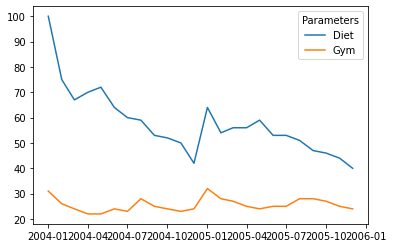

In [33]:
plt.plot(df_2004_2005['month'], df_2004_2005['diet'], label='Diet')
plt.plot(df_2004_2005['month'], df_2004_2005['gym'], label='Gym')
plt.legend(title="Parameters")
plt.show()

## Now we want to create a Flask app that graphs this in a dynamic way